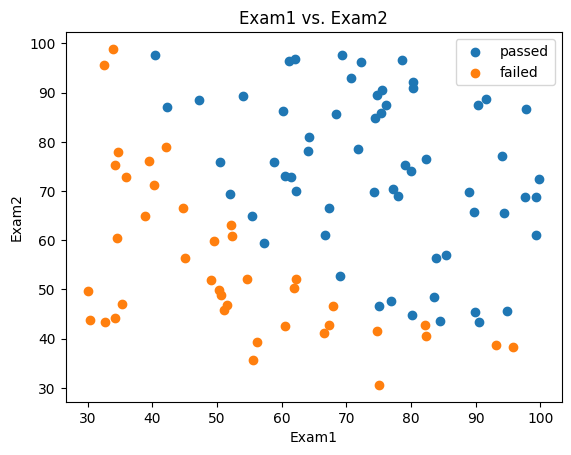

(100, 2) (100,)
0.89
passed


/Users/jiaronghe/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


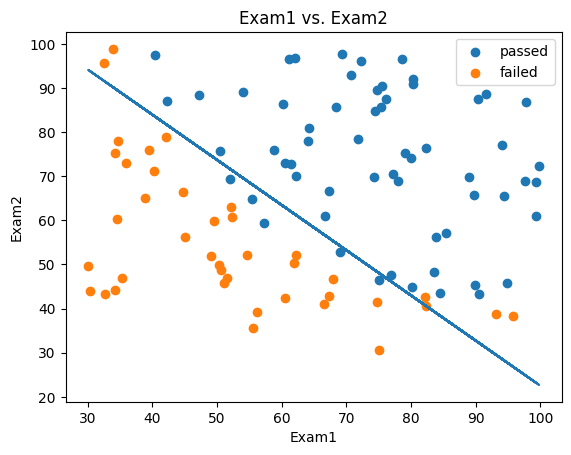

1.0


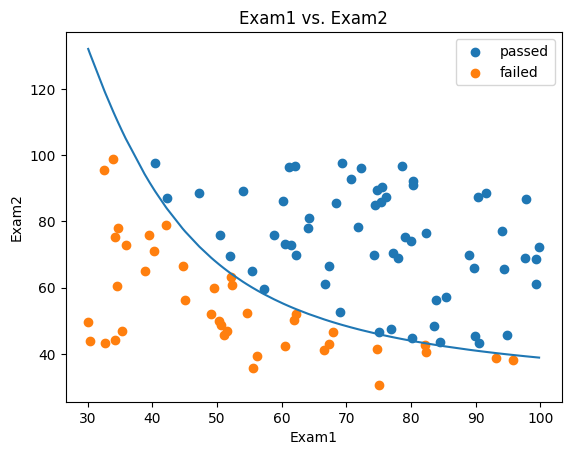

In [27]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv("examdata.csv")
data.head()

mask = data.loc[:, "Pass"] == 1

# visualized data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(
    data.loc[:, "Exam1"][mask],
    data.loc[:, "Exam2"][mask]
)
failed = plt.scatter(
    data.loc[:, "Exam1"][~mask],
    data.loc[:, "Exam2"][~mask]
)
plt.title("Exam1 vs. Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.show()

# prepare data
X = data.drop(["Pass"], axis=1)
y = data.loc[:, "Pass"]
X1 = data.loc[:, "Exam1"]
X2 = data.loc[:, "Exam2"]

print(X.shape, y.shape)

# build model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, y)

# predict
y_pred = LR.predict(X)

# check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(accuracy)

# predict test data
y_test = LR.predict([[70, 65]])
print("passed" if y_test == 1 else "failed")

# 边界曲线
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
X2_new = -(theta0 + theta1 * X1) / theta2

fig3 = plt.figure()
passed = plt.scatter(
    data.loc[:, "Exam1"][mask],
    data.loc[:, "Exam2"][mask]
)
failed = plt.scatter(
    data.loc[:, "Exam1"][~mask],
    data.loc[:, "Exam2"][~mask]
)
plt.title("Exam1 vs. Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.plot(X1, X2_new)
plt.show()

# create new data (2次)
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2

X_new = {
    "X1": X1,
    "X2": X2,
    "X1^2": X1_2,
    "X2^2": X2_2,
    "X1X2": X1_X2,
}
X_new = pd.DataFrame(X_new)

LR2 = LogisticRegression()
LR2.fit(X_new, y)

y_pred_2 = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y_pred_2)
print(accuracy2)

X1_new = X1.sort_values()

_theta0 = LR2.intercept_
_theta1,_theta2,_theta3,_theta4,_theta5 = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]

a = _theta4
b = _theta5 * X1_new + _theta2
c = _theta0 + _theta1 * X1_new + _theta3*X1_new*X1_new

X2_new_boundary = (-b+np.sqrt(b*b-4*a*c)) / (2*a)

fig4 = plt.figure()
passed = plt.scatter(
    data.loc[:, "Exam1"][mask],
    data.loc[:, "Exam2"][mask]
)
failed = plt.scatter(
    data.loc[:, "Exam1"][~mask],
    data.loc[:, "Exam2"][~mask]
)
plt.title("Exam1 vs. Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.plot(X1_new, X2_new_boundary)
plt.show()
